In [40]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


data_2d = pd.read_csv("/data_2d.csv", header=None)
mnist = pd.read_csv("/mnist.csv", header=None)

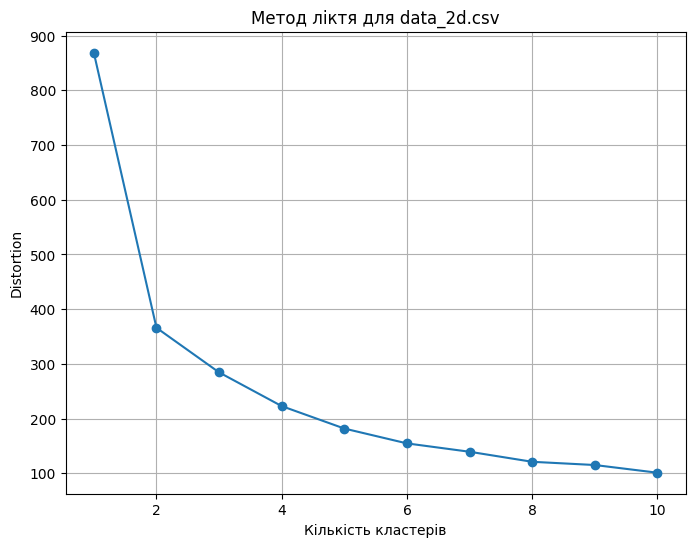

In [41]:
# Застосування алгоритму K-Means для файлу data_2d
max_clusters = 10
inertias_data = []

for n_clusters in range(1, max_clusters + 1):
    kmeans_data = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    kmeans_data.fit(data_2d)
    inertias_data.append(kmeans_data.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertias_data, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.title('Метод ліктя для data_2d.csv')
plt.grid()
plt.show()

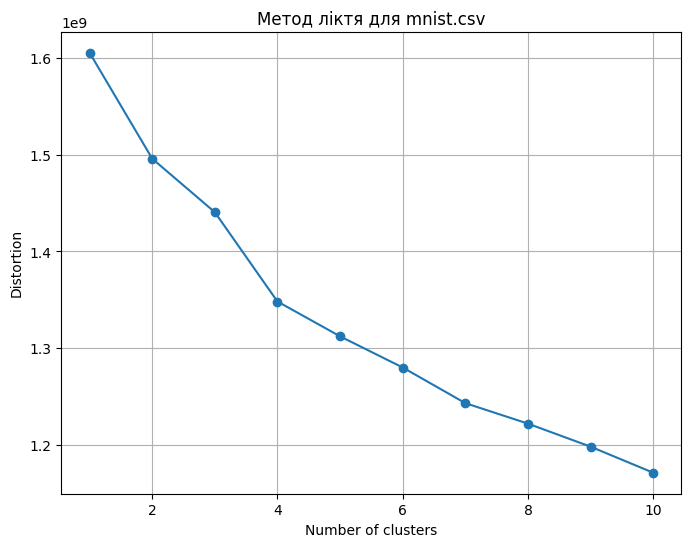

In [42]:
# Застосування алгоритму K-Means для файлу mnist
inertia_mnist = []

for n_clusters in range(1, max_clusters + 1):
    kmeans_mnist = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    kmeans_mnist.fit(mnist)
    inertia_mnist.append(kmeans_mnist.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia_mnist, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.title('Метод ліктя для mnist.csv')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.show()

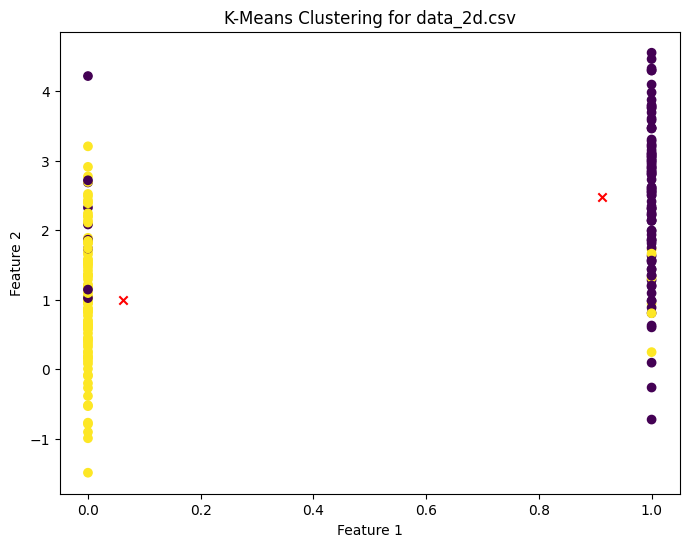

In [43]:
# Вибираємо оптимальну кількість кластерів для файлу data_2d
optimal_clusters_2d = 2

# Кластеризація з оптимальною кількістю кластерів
kmeans_data_2d = KMeans(n_clusters=optimal_clusters_2d, n_init='auto', random_state=0)
kmeans_data_2d.fit(data_2d)

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[0], data_2d[1], c=kmeans_data_2d.labels_, cmap='viridis')
plt.scatter(kmeans_data_2d.cluster_centers_[:, 0], kmeans_data_2d.cluster_centers_[:, 1], marker='x', c='red')
plt.title('K-Means Clustering for data_2d.csv')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

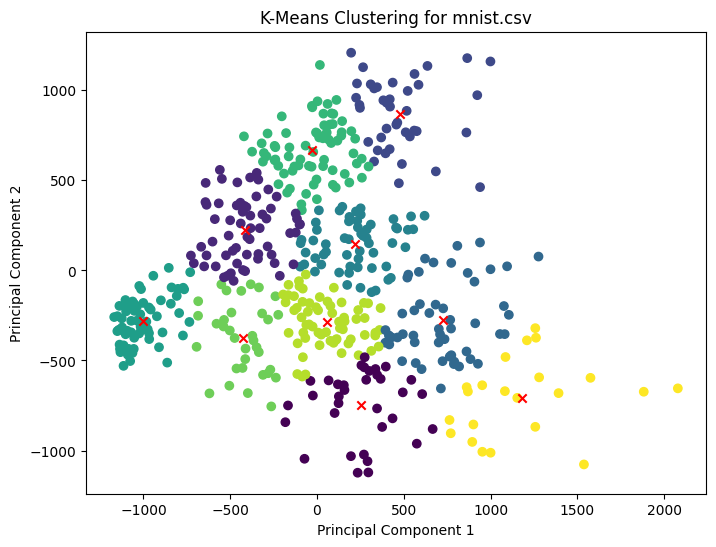

In [44]:
# Застосування K-Means для файлу mnist.csv за допомогою PCA
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)

# Вибираємо оптимальну кількість кластерів для файлу mnist.csv
optimal_clusters_mnist = 10

# Кластеризація з оптимальною кількістю кластерів
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init='auto', random_state=0)
kmeans_mnist.fit(mnist_pca)

plt.figure(figsize=(8, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=kmeans_mnist.labels_, cmap='viridis')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], marker='x', c='red')
plt.title('K-Means Clustering for mnist.csv')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()